## Final Project Submission

Please fill out:
* Student name: Steven Jasper
* Student pace: part time online
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:

## Attributes/Features
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


## Problem Statement
_____
Our bank has provided data on previous telemarketing campaigns and wishes to improve the number of subscriptions. Our goal is to utilize predictive analysis to develop a model which will optimize our 'target' selection when running telemarketing campaigns for term-deposits. We also aim to provide firm, data-driven recommendations to the business for potential future targeted telemarketing campaigns.

## Methodology
___
We will be utilizing the OSEMN Process for building our model. This is described by 5 steps:

* Obtain
* Scrub
* Explore
* Model
* Interpret

## Domain Knowledge
___
A term deposit can be defined as a fixed-term investment that includes the deposit of money into an account at a financial institution. We want more customers to subscribe to our term deposit accounts because it give our business more certainty as to how much money is available for loans. Since term deposit accounts hold the money for a fixed amount of time at the cost of a higher interest rate, it prevents the contributor from withdrawing funds from the account for a fixed amount of time. 

## Business Value
___
Obtaining more subscribers to term-deposits means more revenue for our bank, and creating a sustainable pipeline for future campaigns will allow for increased revenue flow. We intend on utilizing predictive analysis to develop a model that can predict if a customer will invest in a term deposit with at least 75% effectiveness (defined by the optimal metric for our data covered later in our analysis).

## Data Cleaning/Preprocessing
__________
This phase will take our data and create a more clear understanding of what it means. We will also begin to clean up missing values, placeholders, and begin to make our data more optimal for our Machine Learning algorithm. First, we will begin to ensure our data is formatted correctly and begin to collect basic metrics for the cleanliness of our data. Then we will move into the preprocessing phase by normalizing our quantitative data and using one-hot encoding to better classify our categorical data.

### Libraries
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, plot_confusion_matrix

from sklearn.metrics import make_scorer, precision_recall_curve

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import time

random_state = 343

## Import and Scrub Data
___

In [2]:
# Your code here - remember to use markdown cells for comments as well!

raw_df = pd.read_csv('bank-additional-full.csv', delimiter=';')

raw_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Train-Test Split
___
We will be splitting our original data into a 75/25 ratio of a train set and a test set repsectively. This is to prevent any data snooping bias while processing our training data. Once we finish processing and training our models on the training set, we will run our test data through identical processing steps and eventually use our chosen modeling method to validate our model further.

In [3]:
train_set, test_set = train_test_split(raw_df, test_size=.25, stratify=raw_df['y'], random_state = 343)
print(train_set.shape)
print(test_set.shape)

(30891, 21)
(10297, 21)


In [4]:
df = train_set.reset_index(drop=True).copy()

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As seen above we do not really have any NaN values in our dataset, which is great. However, we want to take a deeper look into the descriptive stats of each column to see if there is anything strange going on.

In [6]:
df.describe()

age      duration      campaign         pdays      previous  \
count  30891.000000  30891.000000  30891.000000  30891.000000  30891.000000   
mean      39.995436    257.973876      2.575087    962.134538      0.173675   
std       10.391019    260.135450      2.792051    187.736280      0.493835   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  30891.000000    30891.000000   30891.000000  30891.000000  30891.000000  
mean       0.088378       93.576815     -40.502107      3.626721   5167.206513  
std        1.566406        0.576417       4.623054      1.731949     72.284058  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Taking a look accross our different numerical columns, the only real 'strange' behavior we have is in our raw_df.pdays column. The entire distribution seems to be 999, well if we take a look at the column dictionary above, we can see that pdays has a placeholder value of 999. Let see if we can determine the proportion of placeholders to actual data, this will help us decide if it is worth keeping the column as a feature all together.

In [7]:
df.pdays.value_counts()

999    29744
3        326
6        325
4         79
7         49
12        45
10        45
2         42
9         41
5         29
13        27
11        24
1         21
15        17
14        17
8         14
0         12
16        11
17         7
18         5
19         3
21         2
22         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

We can see that a vast majority of the data in this column is placeholder data. With no way to replace this data in a way that makes sense, and won't dirty our data, we are going to drop this column.

We also see within our data dictionary that the duration column is only included for the sole purpose of benchmarking and should be discarded if we are intending to have a realistic predictive model. We will drop this column as well.

Next we are going to check our data types and validate that they are in a proper form for our machine to understand.

In [8]:
df.drop(columns = ['pdays','duration'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30891 entries, 0 to 30890
Data columns (total 19 columns):
age               30891 non-null int64
job               30891 non-null object
marital           30891 non-null object
education         30891 non-null object
default           30891 non-null object
housing           30891 non-null object
loan              30891 non-null object
contact           30891 non-null object
month             30891 non-null object
day_of_week       30891 non-null object
campaign          30891 non-null int64
previous          30891 non-null int64
poutcome          30891 non-null object
emp.var.rate      30891 non-null float64
cons.price.idx    30891 non-null float64
cons.conf.idx     30891 non-null float64
euribor3m         30891 non-null float64
nr.employed       30891 non-null float64
y                 30891 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 4.5+ MB


These data types seem to be in line with what we expect prior to modeling, now that we have scrubbed the data a good amount, we will move towards testing our numeric columns for multicolinearity as well as taking a look at our categorical data to determine any shortcomings of our data.

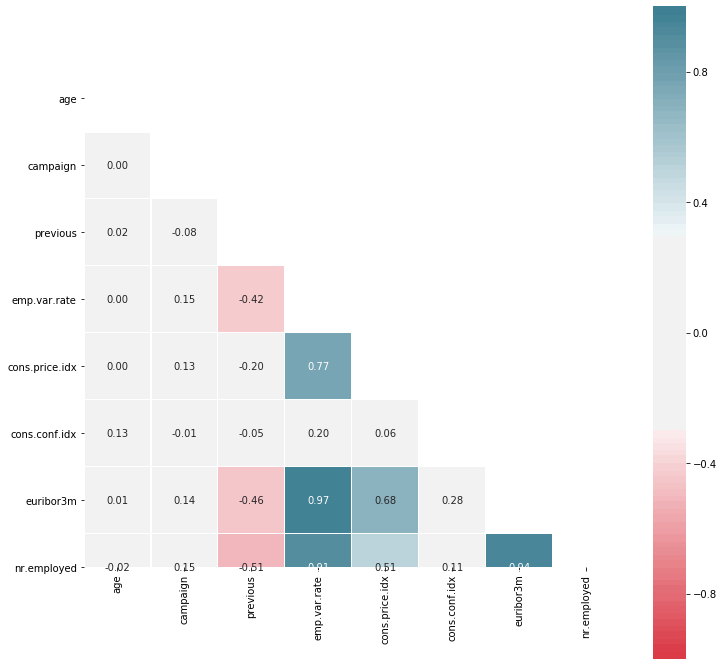

In [9]:
plt.figure(figsize= (12,12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, center = 0, vmin = -1, vmax = 1, square=True, linewidths=.5, annot = True, fmt='.2f' ,cmap=sns.diverging_palette(10,220,sep = 80, n = 100))

We can see that there area number of features that have high correleation with eachother, this will lead to the issue of multicolliniarity within our model. However, multicollinearity should not be too much of an issue as we are not using methods such as a Naive Bayes algorithm. The methods we will be using do not assume an inherit independence between our features.
___

Next we will take a look at our categorical data and search for any inconsistencies, such as unknown data and other placeholders. We can find our categorical data by taking a look at our data types we discovered above.

In [10]:
categoricals = df.select_dtypes(include=object).columns

for col in categoricals:
    print("Feature: {}\n{} \n".format(col, df[col].value_counts(normalize=True)))

Feature: job
admin.           0.254022
blue-collar      0.223819
technician       0.164676
services         0.095173
management       0.070894
retired          0.041468
entrepreneur     0.035641
self-employed    0.034897
housemaid        0.025218
unemployed       0.024829
student          0.021624
unknown          0.007737
Name: job, dtype: float64 

Feature: marital
married     0.606228
single      0.279887
divorced    0.112233
unknown     0.001651
Name: marital, dtype: float64 

Feature: education
university.degree      0.296850
high.school            0.231200
basic.9y               0.146807
professional.course    0.128711
basic.4y               0.100903
basic.6y               0.054579
unknown                0.040530
illiterate             0.000421
Name: education, dtype: float64 

Feature: default
no         0.790975
unknown    0.208961
yes        0.000065
Name: default, dtype: float64 

Feature: housing
yes        0.525460
no         0.449678
unknown    0.024862
Name: housing, dtyp

Here we will walk through each feature that seems to have a placeholder value and discuss unknown data and how we may handle it.

###### job

This feature shows us what career each individual is. The data is generally spread, there is clearly more dominant traits, however it is not to the point where it is concerning. For the unknown values, this will be filled utlizing distance based imputation via K-nearest neighbors (KNN) imputation.

###### marital

The marital status of individuals seems to be dominated by married, however this is understandable and can remain without issue. We do have an unknown value that is about .002\% of our data. There are a few options here, we can either impute the data somehow, or simply get rid of those values. It would not necessarily be detrimental to drop such  a small amount of data, however we can just simply replace these values with the mode (married) as it is such a large portion of the set.

###### education

Education is generally the same as the job column, we can either get rid of the unknowns, or keep them and impute them. If we were to get rid of the unknowns we would be getting rid of 4\% of our data, which we may not want to do. We will treat this column the same as job and utilize KNN inputation to fill our missing values.

###### default

The default columns describes whether the customer has a credit in default. We see that there is an overwhelmingly small amount of 'yes' entries, so it would be safe to fill our missing data with the mode (no) which is almost 80\%.

###### housing

This column determines whether our customer currently has a housing loan or not, we can see that the data is spread generally even with a majority of entries as 'yes'. We can see that a very small amount (roughly 2\%) of entries are unknown. Here we can also utilize KNN imputation to fill these values.

###### loan

The loan column is our last categorical value that has a placeholder. This feature has a large majority of the data in the 'no' category, meaning that a majority of the customers does not currently have a loan taken out. Here we can go ahead and fill our 'unknown' data with the mode for this columns.

We will make the 'Mode' changes below, and we will implement the KNN imputation later on.

In [11]:
cols = ['marital', 'default', 'loan']

for col in cols:
    df[col]  = df[col].replace('unknown', None)
    df[col] = df[col].fillna(df[col].mode())

In [12]:
for col in cols:
    print(df[col].value_counts(), '\n')

married     18755
single       8656
divorced     3480
Name: marital, dtype: int64 

no     30889
yes        2
Name: default, dtype: int64 

no     26092
yes     4799
Name: loan, dtype: int64 



###### Duplicate Check
___
Next we will begin to take a look in our data to see if there are any duplicate entries. If we do find duplicates, we will remove these entries as to not violate our data.

In [13]:
df[df.duplicated()]

age          job  marital          education default housing loan  \
1072    34  blue-collar   single           basic.9y      no     yes   no   
1135    57  blue-collar  married           basic.9y      no     yes   no   
1621    34       admin.   single  university.degree      no     yes   no   
1771    30       admin.   single  university.degree      no      no   no   
1845    56      retired  married           basic.4y      no     yes   no   
...    ...          ...      ...                ...     ...     ...  ...   
30857   30       admin.   single        high.school      no     yes   no   
30859   38   management  married  university.degree      no      no   no   
30862   42       admin.   single  university.degree      no      no   no   
30864   36  blue-collar  married           basic.9y      no     yes   no   
30874   35  blue-collar  married           basic.4y      no      no   no   

         contact month day_of_week  campaign  previous     poutcome  \
1072    cellular   jul         thu         1         0  nonexistent   
1135    cellular   aug         mon         2         0  nonexistent   
1621    cellular   aug         mon         3         0  nonexistent   
1771    cellular   aug         mon         2         0  nonexistent   
1845    cellular   aug         wed         1         0  nonexistent   
...          ...   ...         ...       ...       ...          ...   
30857   cellular   may         mon         1         0  nonexistent   
30859   cellular   aug         wed         1         0  nonexistent   
30862   cellular   aug         wed         1         0  nonexistent   
30864   cellular   jul         thu         1         0  nonexistent   
30874  telephone   may         thu         2         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
1072            1.4          93.918          -42.7      4.963       5228.1  no  
1135            1.4          93.444          -36.1      4.965       5228.1  no  
1621            1.4          93.444          -36.1      4.965       5228.1  no  
1771            1.4          93.444          -36.1      4.965       5228.1  no  
1845            1.4          93.444          -36.1      4.967       5228.1  no  
...             ...             ...            ...        ...          ...  ..  
30857          -1.8          92.893          -46.2      1.244       5099.1  no  
30859           1.4          93.444          -36.1      4.965       5228.1  no  
30862           1.4          93.444          -36.1      4.964       5228.1  no  
30864           1.4          93.918          -42.7      4.963       5228.1  no  
30874           1.1          93.994          -36.4      4.860       5191.0  no  

[1173 rows x 19 columns]

Since there is a large amount of duplicates here we will go ahead and drop any duplicated data while maintaining a copy of each. We will determine how much overall data was lost by checking the shape before and after the change.

In [14]:
before = df.shape
print(before)

(30891, 19)


In [15]:
df.drop_duplicates(keep = 'first', inplace = True)

In [16]:
after = df.shape
print(after)

(29718, 19)


In [17]:
print('After this chage we have only sacrificed {}% of our data.'.format(round((1-(after[0]/before[0]))*100,3)))

After this chage we have only sacrificed 3.797% of our data.


Only losing a small percentage of our data certainly seems like a good investment when we are not allow duplicate values to skew our data. Ideally this data would include unique identifiers to more easily determine duplicate values, however this was not done prior to collection.
___
We will now take a look at some of the names for our categorical values, we will replace special characters and periods with _ symbol.
We see that in the job column the 'admin.' entry looks a bit off, we are going to shorten that by removing the . Also, in the column names they also have a '.' which is separating the words. We see this in the education columns as well.

In [18]:
# replace all columns with '.' with _
df.columns = df.columns.str.replace('.', '_')
# replace entries in the job and education columns with '_' instead of '.'
df['education'] = df['education'].str.replace('.', '_')
df['job'] = df['job'].str.replace('.', '_')

### Exploratory Data Analysis
---
Now that our data is clean we will begin to do a bit of exploration of our data and see if we can find any insight at the top level of our data. The goal is to come up with 3 business recommendations and a total of 3 visualizations that provide more insight into our data.


First lets just take a look at the spread of our 'yes' and 'no' data, how many people within our data actually subscribed?

Text(0.5, 1.0, 'Subscriptions')

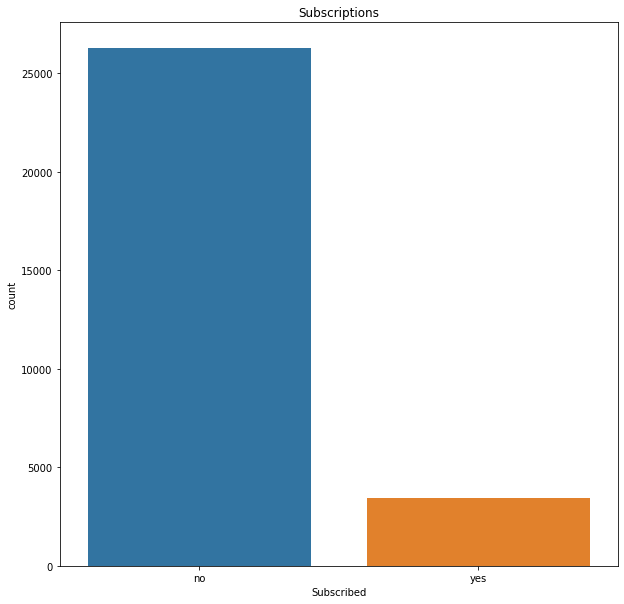

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['y'])
plt.xlabel('Subscribed')
plt.title('Subscriptions')


This shows that it is pretty obvious a majority of customers do not subscribe to our term deposits. There is severe class imbalance within the set. Lets take a look at this data when it is normalized.
___


In [20]:
df['y'].value_counts(normalize=True)

no     0.883976
yes    0.116024
Name: y, dtype: float64

Only about 12% of our individuals subscribed to term deposits, this clearly exposes massive class imbalance in the data. We will account for this class imbalance by utilizing SMOTE vs. a general bootstrap duplication technique later when we move to preparing our data for modeling.

Let's take a look at all of our continuous data to get a better idea of how this data is represented.

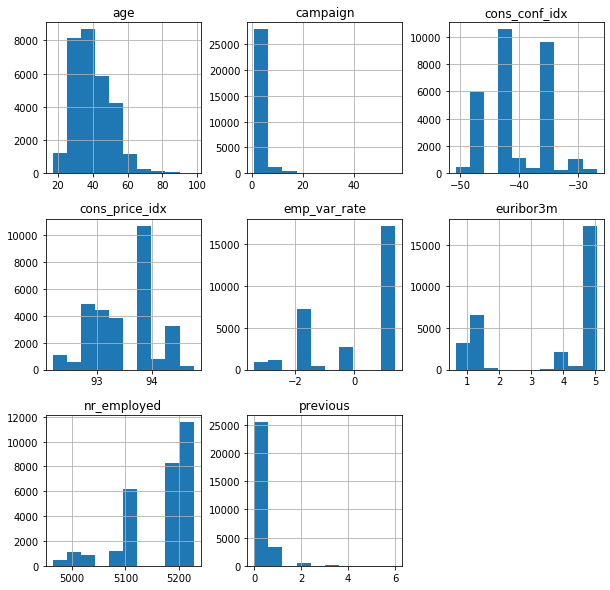

In [21]:
df.hist(figsize=(10,10))
plt.show()

Now lets take a look at some categorical data. Let's see how the marital status determines whether an individual will subscribe to a term deposit.

Text(0.5, 1.0, 'Marital Status vs. Subscription Status')

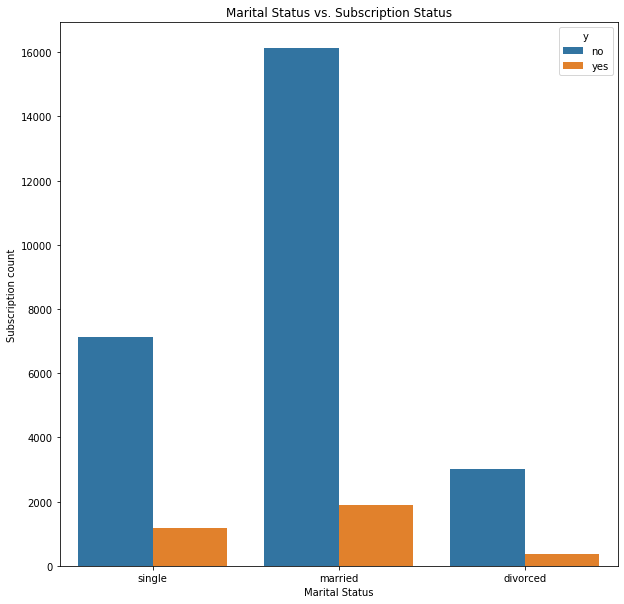

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x = df['marital'], hue = df['y'])
plt.xlabel('Marital Status')
plt.ylabel('Subscription count')
plt.title('Marital Status vs. Subscription Status')

Let's see if we can apply the same concept above to all of our categorical data.

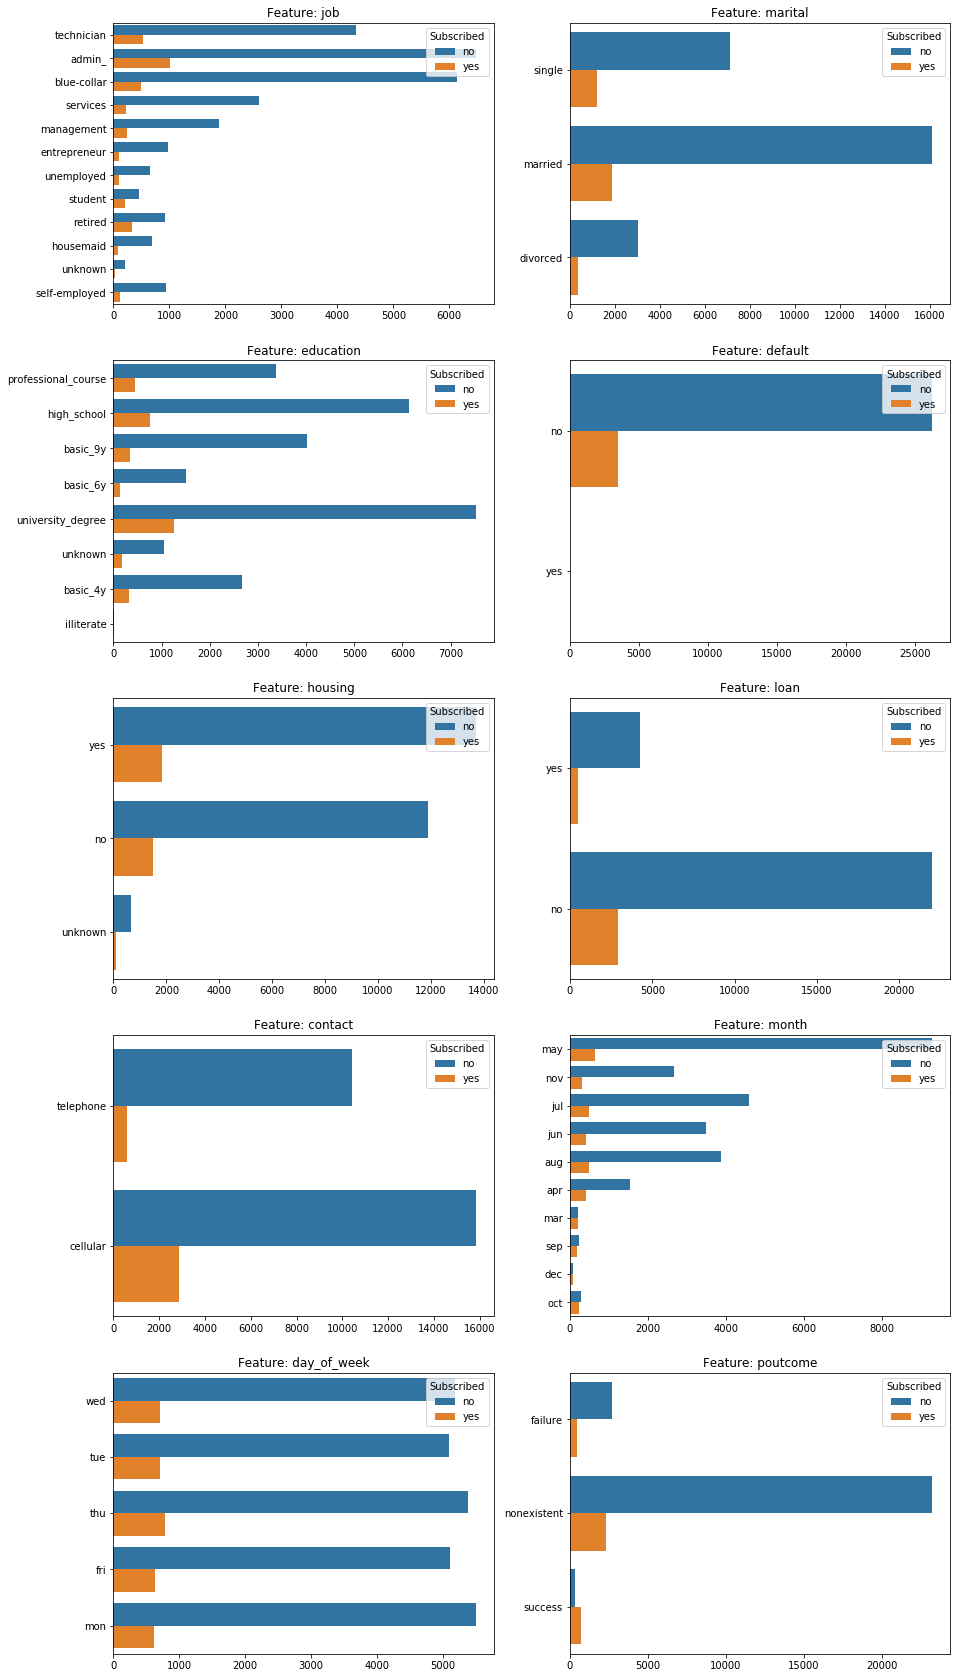

In [23]:
# grabs all categorical features from above while removing our y feature
cat_cols = list(categoricals[:-1])

fig, axes = plt.subplots(5,2, figsize=(15,30))
for ind, cat in enumerate(cat_cols):
    ax_x = ind // 2
    ax_y = ind % 2
    # plot horizontal bar plot, horizontal due to the number of value on x axis
    sns.countplot(y=df[cat],orient='h', hue=df['y'],ax = axes[ax_x,ax_y])
    
    axes[ax_x, ax_y].set_title('Feature: {}'.format(cat))
    axes[ax_x, ax_y].set_xlabel(None)
    axes[ax_x, ax_y].set_ylabel(None)
    axes[ax_x, ax_y].legend(title='Subscribed', loc='upper right')
plt.show()
    

Here we see more edvidence of class imbalance, it is difficult to tell what values actually contribute to the subscription outcome.

Let's visualize this slightly different, starting with our marital feature again. Here we will do a horizontal bar, but this time it will be stacked. First, we need to do some minor data manipulation in order to graph this properly.

In [24]:
# group by both marital and y to get full sub counts for each
counts = df[['marital','y']].groupby(['marital', 'y']).size().unstack()
counts

y            no   yes
marital              
divorced   3020   368
married   16126  1890
single     7124  1190

In [25]:
# sum the counts to obtain a total marital counts
marital_counts = counts.sum(axis='columns')
marital_counts

marital
divorced     3388
married     18016
single       8314
dtype: int64

In [26]:
# use total counts and sub counts for each to determine proportions for each respective marital status
marital_propor = counts.div(marital_counts, axis='index')
marital_propor

y               no       yes
marital                     
divorced  0.891381  0.108619
married   0.895093  0.104907
single    0.856868  0.143132

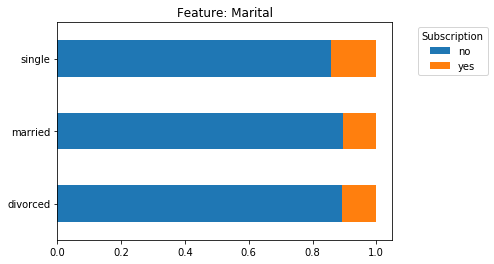

In [27]:
# plot proportions on a horizontal bar graph
marital_propor.plot.barh(stacked=True)

plt.legend(loc='upper right', bbox_to_anchor = (1.3, 1), title = ('Subscription'))
plt.title('Feature: Marital')
plt.ylabel(None)
plt.show()

Above it becomes much more clear which category has a higher chance of producing a subscription. However small the difference may be, it gives us insight that single individuals seem to subscribe more to term deposits.
___

Now lets apply this to all of our categorical data. We will create a function that will go through each category and plot a similar graph as above.

In [28]:
def barh_prop_graph(feature, df, target, ax = None):
    '''
    This function will group our data by the selected feature and process proportions to graph a stacked bar graph
    Args: 
        features: name of a feature we wish to graph
        df: dataframe name
        target: target variable
        ax: axes, default is None
    Returns:
        None
    '''
    counts = df[[feature, target]].groupby([feature,target]).size().unstack()
    feat_counts = counts.sum(axis='columns')
    feat_props = counts.div(feat_counts, axis='index')
    
    feat_props.plot.barh(stacked=True, ax = ax)
    if ax == None:
        plt.legend(loc='upper right', bbox_to_anchor = (1.3, 1), title = ('Subscription'))
        plt.title('Feature: {}'.format(feature))
        plt.ylabel(None)
        plt.show()
    else:
        ax.set_title('Feature {}'.format(feature))
        ax.set_label(None)
    return None

Now that we have a reusable function to graph our data in the desired format, we will move forward with implementing this on all of our categorical features.

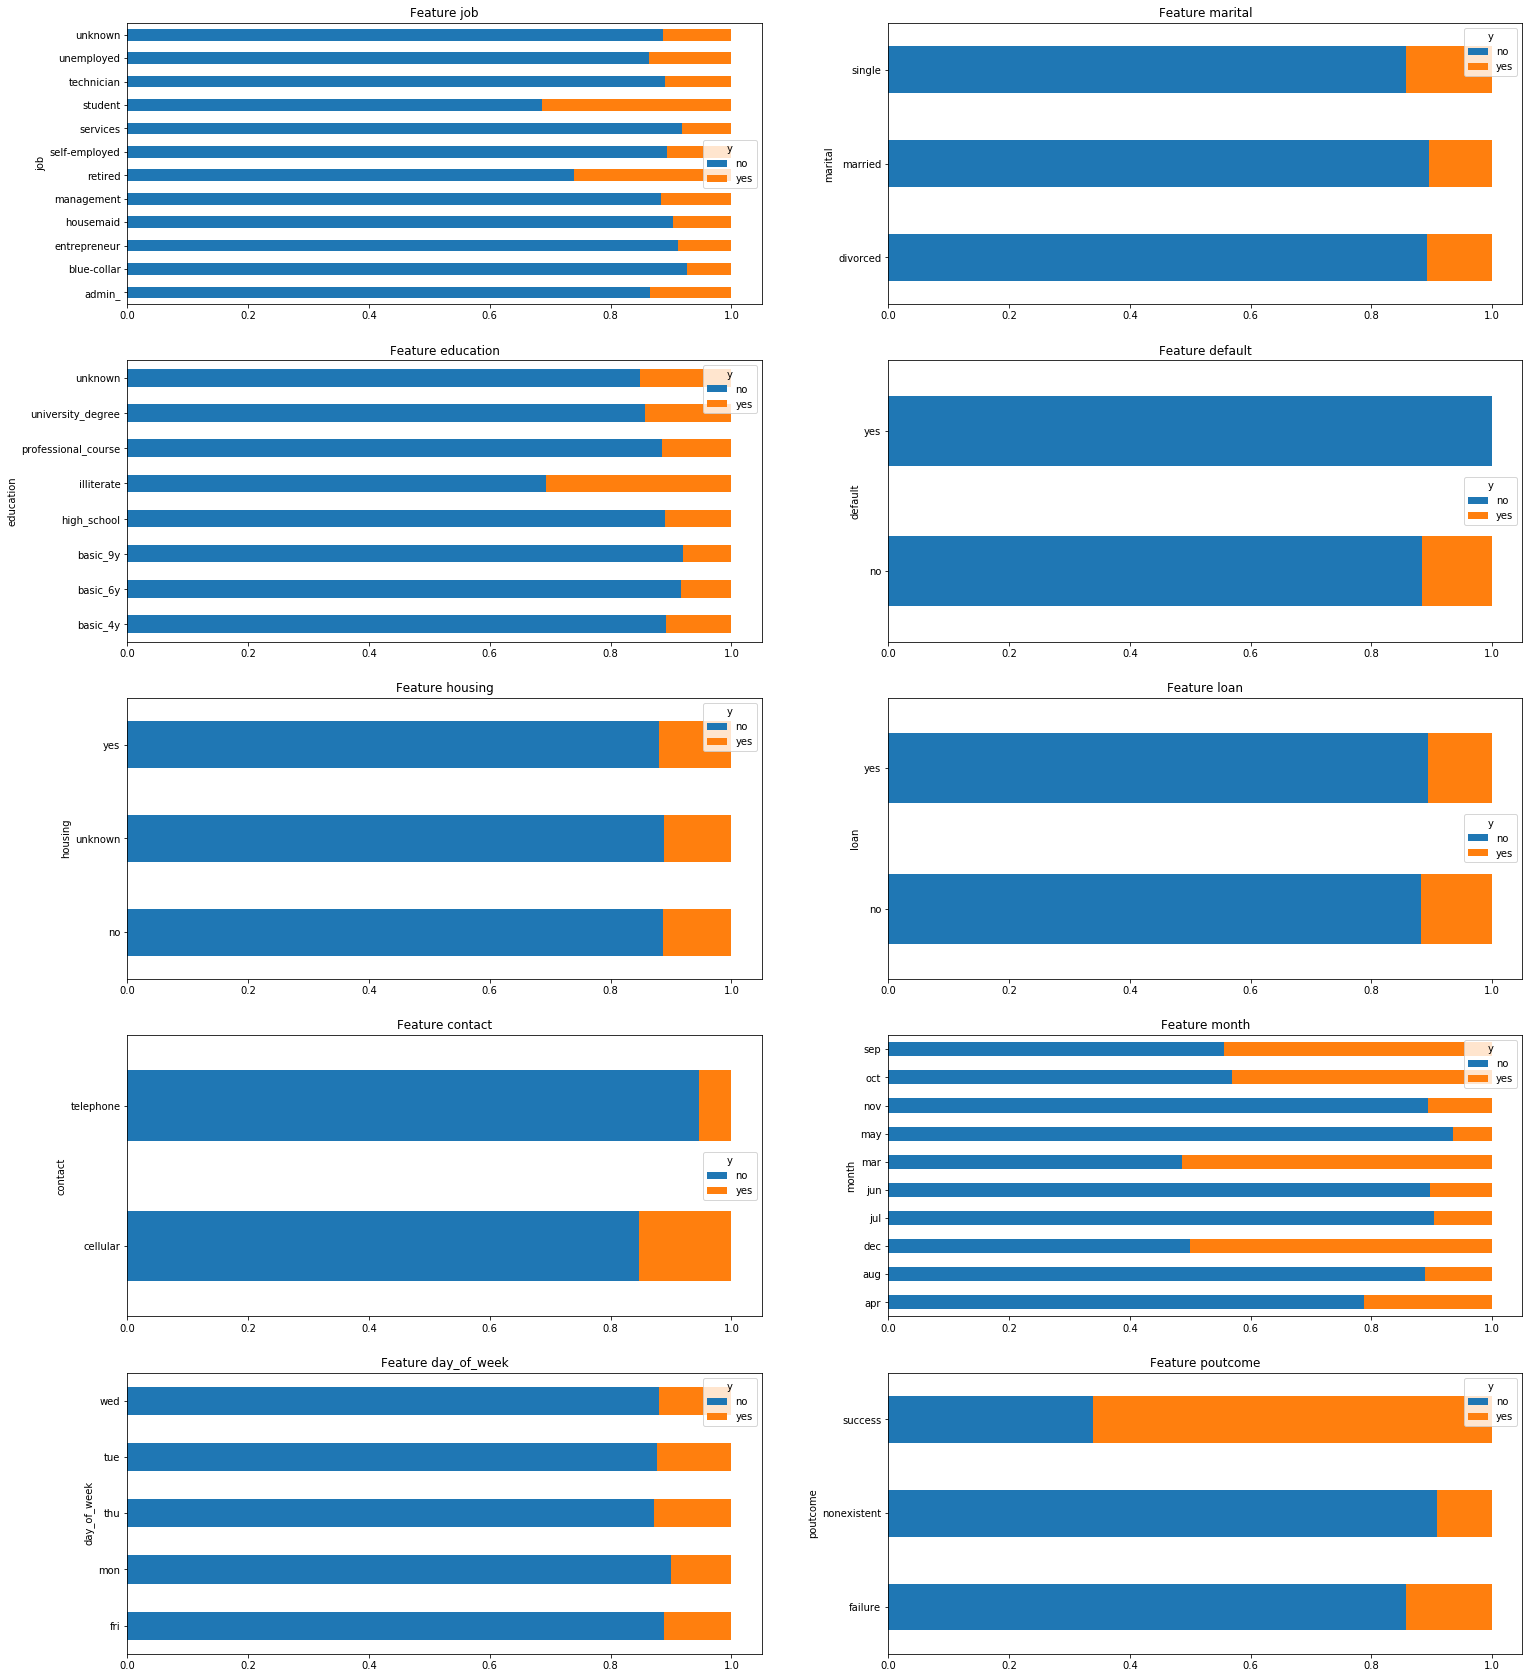

In [29]:
fig, axes = plt.subplots(5,2, figsize=(25,30))

for ind, col in enumerate(cat_cols):
    ax_x = ind // 2
    ax_y = ind % 2
    barh_prop_graph(col, df, 'y', ax=axes[ax_x,ax_y])
plt.show()

These visualizations show a number of pretty surprising results. 

A strong indicator seems to be the **poutcome** feature. **Individuals who had previously subscribed to a term deposit seem likely to subscribe to another.** This will tie into one of our **business recomendations**. Our recommendation will be to try and target individuals who have subscribed in previous campaigns.

We can also see that the **job** feature shows us that Students and those who are retired are also more likely to subscribe to our term deposit. 

The **education** feature shows that a higher proportion of illiterate individuals elected to subscribe to our term deposits. This is an interesting point, could it be that less-educated individuals are at higher risk for predatory marketing? This could become a question of ethics when taking this into account for training our data. For the sake of this analysis we will leave it be, however it is important to recognize the potential for a targeting bias towards uneducated and taking advantage of this.
____
Let's take a deeper dive into some of these features specifically, and see if we can expand on the observations above.

First, we are going to take a look at the proportion of retired individuals, which are also classified as illiterate, subscribed to our term deposit.

In [30]:
retired_illiterate = df[(df['job'] == 'retired') & (df['education'] == 'illiterate')]
print(len(retired_illiterate))
retired_illiterate_subscribed = retired_illiterate[(df['y'] == 'yes')]
retired_illiterate_subscribed.head()

3


age      job   marital   education default housing loan    contact  \
4701    80  retired   married  illiterate      no     yes  yes   cellular   
24675   42  retired  divorced  illiterate      no      no   no  telephone   

      month day_of_week  campaign  previous     poutcome  emp_var_rate  \
4701    aug         tue         1         1      success          -2.9   
24675   aug         wed         3         0  nonexistent          -2.9   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed    y  
4701           92.201          -31.4      0.883       5076.2  yes  
24675          92.201          -31.4      0.834       5076.2  yes

So above we can see that despite the fact that 67\% of our data technically supports the idea that individuals who are retired are more likely to subscribe to our term deposits, there is nowhere close to enough data to support this claim. We can simply discount this claim for the time being until there is more data, however it seems very unlikely.

___
Next we will take a look at a subset of our data where the individuals previously subscribed to our term deposit. We want to find out if there is any deeper insight we can find from these individuals.

We will first take a look at the data for these individuals as a whole, then we will take a look to see if there is any additional assumptions that can be made.

In [31]:
pout_success = df[(df['poutcome'] == 'success')]
len(pout_success)

1032

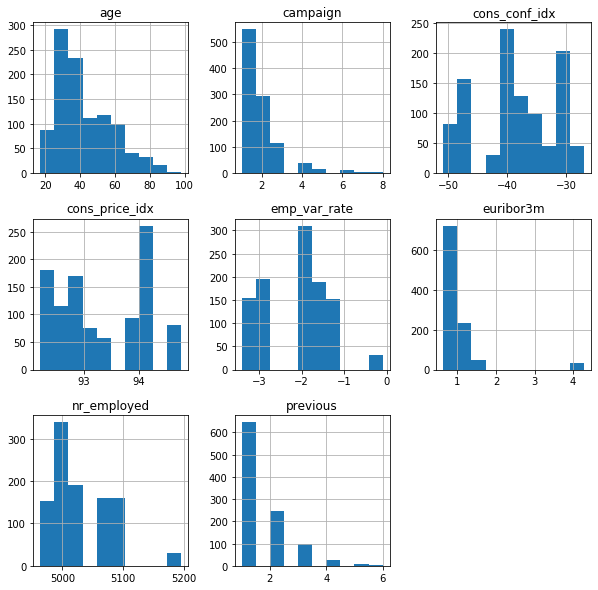

In [32]:
pout_success.hist(figsize=(10,10))
plt.show()

There is not much here to gather, outside of some obvious value skewness. For example, we can see that it looks like the age 30-40 range is overly represented in successful subscriptions of individuals who has subscribed before. However I believe it is safe to say that a good **recommendation** would be to steer towards individuals who have subscribed in the past, as 65% of these individuals resubscribed.

Next we will take a look at the month the customers were called. Can we find an optimal time to contact individuals? Let's find out what the data suggests.

In [33]:
dfGB = df[['month', 'day_of_week', 'y']].groupby(['month', 'day_of_week', 'y']).size().unstack()
dfGB

y                    no  yes
month day_of_week           
apr   fri           402   50
      mon           455   57
      thu           395  186
      tue           123   62
      wed           165   62
aug   fri           675   93
      mon           812   74
      thu           846   97
      tue           802  116
      wed           752  108
dec   fri            13    7
      mon            21   14
      thu            14   16
      tue             6   13
      wed            11   15
jul   fri           651   87
      mon           989   93
      thu          1062  109
      tue           970   99
      wed           933  102
jun   fri           788   61
      mon           798   95
      thu           630   66
      tue           632   93
      wed           632   88
mar   fri            35   35
      mon            58   44
      thu            38   34
      tue            44   61
      wed            22   34
may   fri          1940  157
      mon          1773  139
      thu          1720  115
      tue          1883  107
      wed          1986  130
nov   fri           497   65
      mon           480   50
      thu           572   72
      tue           532   64
      wed           584   67
oct   fri            52   47
      mon            67   26
      thu            65   52
      tue            56   47
      wed            51   49
sep   fri            56   35
      mon            45   16
      thu            44   41
      tue            47   48
      wed            46   50

In [34]:
import plotly.express as px
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
dfTemp = df[(df['y_num'] == 1)]
fig = px.treemap(dfTemp,
                path = ['month','day_of_week'],
                values= 'y_num')
fig.show()

The above graphic demonstrates what month/day_of_week combination provides the highest number of subscriptions. Based off this top level analysis we can develop the **recommendation** to increase the volume of calls that are made during May on Fridays. 

You may notice that this graphic does not take into account class imbalance as we saw this feature included in our above analysis. Since our problem statement does not directly limit the volume of calls we can make optimization does not necessarily need to be at the forefront. This falls into the **future work** category, as I would like to take a deeper statistical dive into this feature to validate that this is a statistically significant observation.

___
### Feature Engineering
Next, we will begin to process our data for modeling. 

Our first step will be to split our data into X and y sets. X will contain our features wheras y will contain our target. We will also reset our index before the split since we have dropped data. Then we will encode our y column to produce a numerical answer.

In [35]:
df = df.reset_index(drop=True)
X = df.drop(columns='y', axis=1)
y = df['y'].copy()

In [36]:
y = y.map(lambda x: 1 if x == 'yes' else 0)

There is a number of features we will be dropping, as they will not provide any information for our models to base predictions off, or they were placeholder columns for earlier analysis. 

In [37]:
X.drop(columns=['y_num','campaign'], axis=1, inplace=True)

#### Feature Scaling

Here we are going to use a StandardScaler to normalize our data.

In [38]:
# Classify our continuous numerical values
X_cont = X.select_dtypes(include=np.number)
# Classify our categorical data
X_cat = X.select_dtypes(include=object)

# Create standardScaler Instance
sScaler = StandardScaler()

# fit and transform our data to scaler
X_cont_scaled = sScaler.fit_transform(X_cont)

# recreate DFs to reform with new data
X_cont_scaled = pd.DataFrame(X_cont_scaled, columns = X_cont.columns)
X_cont_scaled.head()

age  previous  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0 -1.157357  1.642427     -1.191000       -1.179784      -1.227588  -1.338578   
1 -0.773745 -0.356412     -2.208930       -1.600128       2.245386  -1.661215   
2  0.568896 -0.356412      0.844861        0.586005      -0.472594   0.781852   
3  1.144313 -0.356412      0.844861        1.528334      -0.278452   0.776676   
4  0.472993  1.642427     -0.109449       -0.650909      -0.321595   0.237223   

   nr_employed  
0    -0.924280  
1    -2.046438  
2     0.849720  
3     0.849720  
4     0.405532

We will go ahead and combine this newly created scaled data with our original categorical data.

In [39]:
X = pd.concat([X_cont_scaled, X_cat], axis = 1)
X.head()

age  previous  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0 -1.157357  1.642427     -1.191000       -1.179784      -1.227588  -1.338578   
1 -0.773745 -0.356412     -2.208930       -1.600128       2.245386  -1.661215   
2  0.568896 -0.356412      0.844861        0.586005      -0.472594   0.781852   
3  1.144313 -0.356412      0.844861        1.528334      -0.278452   0.776676   
4  0.472993  1.642427     -0.109449       -0.650909      -0.321595   0.237223   

   nr_employed          job   marital            education default housing  \
0    -0.924280   technician    single  professional_course      no     yes   
1    -2.046438       admin_   married          high_school      no     yes   
2     0.849720   technician  divorced  professional_course      no      no   
3     0.849720  blue-collar   married             basic_9y      no      no   
4     0.405532  blue-collar   married             basic_9y      no      no   

  loan    contact month day_of_week     poutcome  
0  yes  telephone   may         wed      failure  
1   no   cellular   nov         tue  nonexistent  
2   no   cellular   jul         thu  nonexistent  
3   no  telephone   jun         fri  nonexistent  
4   no   cellular   nov         fri      failure

#### Categorical Feature Imputing

As mentioned earlier in our analysis we will be utilizing K-Nearest Neighbors imputation to fill our **unknown** values with values that are 'most like' them. This process requires some manipulation of our data frame prior to actually imputing our data here. 

There are 3 general steps to our imputing methods.

 * Converting non-missing categorical features into ordinal values so we can have an ordinal dataframe.
 * We will then impute the missing values into the ordinal DataFrame.
 * Then we must bring our data from the ordinal dataframe back into the original categorical values.

In [40]:
# define our categorical features
cat_cols = X.select_dtypes(include= object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [41]:
# define features with unknown values
cols = ['job', 'education', 'housing']

#replace unknown data with np.nan
for col in cols:
    X[col] = X[col].replace('unknown', np.nan)
# validate above script
X.isna().any()

age               False
previous          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
job                True
marital           False
education          True
default           False
housing            True
loan              False
contact           False
month             False
day_of_week       False
poutcome          False
dtype: bool

In [42]:
# adapted from Datacamp advanced imputation techniques
# https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=7

# Create dictionary for ordinal encoders
ordinal_enc_dict = {}

for col in cat_cols:
    # assign encoder instance to dict
    ordinal_enc_dict[col] = OrdinalEncoder()
    
    cols = X[col]
    col_not_null = cols[cols.notnull()]
    reshaped_val = col_not_null.values.reshape(-1,1)
    # encode non-null values in column
    ordinal_vals = ordinal_enc_dict[col].fit_transform(reshaped_val)
    
    
    # Update non-null values in X with encoded values
    X.loc[cols.notnull(), col] = np.squeeze(ordinal_vals)
# check encoding
X.head()

age  previous  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0 -1.157357  1.642427     -1.191000       -1.179784      -1.227588  -1.338578   
1 -0.773745 -0.356412     -2.208930       -1.600128       2.245386  -1.661215   
2  0.568896 -0.356412      0.844861        0.586005      -0.472594   0.781852   
3  1.144313 -0.356412      0.844861        1.528334      -0.278452   0.776676   
4  0.472993  1.642427     -0.109449       -0.650909      -0.321595   0.237223   

   nr_employed job  marital education  default housing  loan  contact  month  \
0    -0.924280   9        2         5        0       1     1        1      6   
1    -2.046438   0        1         3        0       1     0        0      7   
2     0.849720   9        0         5        0       0     0        0      3   
3     0.849720   1        1         2        0       0     0        1      4   
4     0.405532   1        1         2        0       0     0        0      7   

   day_of_week  poutcome  
0            4         0  
1            3         1  
2            2         1  
3            0         1  
4            0         0

Above we completed step 1 of our imputation process, now we will actually impute our data.

In [43]:
# adapted from Data Camp advanced imputation techniques
# https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=7
# create a copy of X
X_imputed = X.copy(deep=True)

# create KNN Impute instance
KNN = KNNImputer()

# apply imputation
X_imputed.iloc[:,:] = KNN.fit_transform(X_imputed)

# Check
X_imputed.isna().any().any()

False

Now that the imputation step is complete and we have confirmed that all missing values have been filled we will move to step 3. This is where we will return back to categoricals in preparation for One-Hot Encoding(OHE)

In [44]:
# reverse step 1 to get back to categorical values
for col in cat_cols:
    # reshape data
    reshaped_col = X_imputed[col].values.reshape(-1,1)
    
    X_imputed[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

X_imputed.head()

age  previous  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0 -1.157357  1.642427     -1.191000       -1.179784      -1.227588  -1.338578   
1 -0.773745 -0.356412     -2.208930       -1.600128       2.245386  -1.661215   
2  0.568896 -0.356412      0.844861        0.586005      -0.472594   0.781852   
3  1.144313 -0.356412      0.844861        1.528334      -0.278452   0.776676   
4  0.472993  1.642427     -0.109449       -0.650909      -0.321595   0.237223   

   nr_employed          job   marital            education default housing  \
0    -0.924280   technician    single  professional_course      no     yes   
1    -2.046438       admin_   married          high_school      no     yes   
2     0.849720   technician  divorced  professional_course      no      no   
3     0.849720  blue-collar   married             basic_9y      no      no   
4     0.405532  blue-collar   married             basic_9y      no      no   

  loan    contact month day_of_week     poutcome  
0  yes  telephone   may         wed      failure  
1   no   cellular   nov         tue  nonexistent  
2   no   cellular   jul         thu  nonexistent  
3   no  telephone   jun         fri  nonexistent  
4   no   cellular   nov         fri      failure

Now that our data is imputed and all unknown values are taken care of, we will move to encode these values further using sklearn's OneHotEncoder to encode our categorical data.

#### Categorical Feature Encoding

In [45]:
# get our data of type Object
X_cat = X_imputed.select_dtypes(include=object)

# create OHE instance
OHE = OneHotEncoder()

# fit and transform
X_cat_OHE = OHE.fit_transform(X_cat)

# view results
X_cat_OHE

<29718x47 sparse matrix of type '<class 'numpy.float64'>'
	with 297180 stored elements in Compressed Sparse Row format>

We can see that OHE creates a sparse matrix of type '<class 'numpy.float64'>'. This helps with potential memory issues since there are alot more columns. We want to make sure to transform these back into a numpy array then a DataFrame for our models.

In [46]:
#get column names from ohe storage
column_names = OHE.get_feature_names(X_cat.columns)

# reconstruct dataframe
X_cat_encoded = pd.DataFrame(X_cat_OHE.toarray(), columns = column_names)

X_cat_encoded.head()

job_admin_  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         1.0              0.0               0.0            0.0   
2         0.0              0.0               0.0            0.0   
3         0.0              1.0               0.0            0.0   
4         0.0              1.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  ...  month_oct  month_sep  day_of_week_fri  \
0             1.0  ...        0.0        0.0              0.0   
1             0.0  ...        0.0        0.0              0.0   
2             1.0  ...        0.0        0.0              0.0   
3             0.0  ...        0.0        0.0              1.0   
4             0.0  ...        0.0        0.0              1.0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0              0.0              0.0              0.0              1.0   
1              0.0              0.0              1.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0               1.0                   0.0               0.0  
1               0.0                   1.0               0.0  
2               0.0                   1.0               0.0  
3               0.0                   1.0               0.0  
4               1.0                   0.0               0.0  

[5 rows x 47 columns]

Now that our data is encoded how we want it and in the format we need it in we will combine our data into our final prepared data frame.

In [101]:
X_prepared = pd.concat([X_cat_encoded, X_imputed.select_dtypes(include = np.number)], axis=1)
X_prepared.head()

job_admin_  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         1.0              0.0               0.0            0.0   
2         0.0              0.0               0.0            0.0   
3         0.0              1.0               0.0            0.0   
4         0.0              1.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  ...  poutcome_failure  poutcome_nonexistent  \
0             1.0  ...               1.0                   0.0   
1             0.0  ...               0.0                   1.0   
2             1.0  ...               0.0                   1.0   
3             0.0  ...               0.0                   1.0   
4             0.0  ...               1.0                   0.0   

   poutcome_success       age  previous  emp_var_rate  cons_price_idx  \
0               0.0 -1.157357  1.642427     -1.191000       -1.179784   
1               0.0 -0.773745 -0.356412     -2.208930       -1.600128   
2               0.0  0.568896 -0.356412      0.844861        0.586005   
3               0.0  1.144313 -0.356412      0.844861        1.528334   
4               0.0  0.472993  1.642427     -0.109449       -0.650909   

   cons_conf_idx  euribor3m  nr_employed  
0      -1.227588  -1.338578    -0.924280  
1       2.245386  -1.661215    -2.046438  
2      -0.472594   0.781852     0.849720  
3      -0.278452   0.776676     0.849720  
4      -0.321595   0.237223     0.405532  

[5 rows x 54 columns]

#### Creating Reusable Pre-Processing Classes
Here we will create 3 classes to streamline our pre-processing technique. This will allow us to conduct the above steps on data whenever we obtain additional data.

In [109]:
# SyntaxCleaner
class SyntaxCleaner(BaseEstimator, TransformerMixin):
    # This class will scrub the syntax of our columns and remove unnecessary columns
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        
        # removing special characters in column names
        specials = "()*&^%$#@!?."
        for char in specials:
            X = X.str.replace(char,'_')
        # replace . in job column data points
        X['job'] = X['job'].str.replace('.', '')
        
        # replace the . in education
        X['education'] = X['education'].str.replace('.', '_')
        
        # Drop unnecessary columns
        X = X.drop(columns = ['duration', 'campaign', 'pdays'], axis=1)
        
        # Assign num column names
        self.num_feat_names = list(X.select_dtypes(include = np.number).columns)
        
        # Assign cat column names
        self.cat_feat_names = list(X.select_dtypes(include = object).columns)
        
        return X
    def get_num_feat_names(self):
        return self.num_feat_names
    def get_cat_feat_names(self):
        return self.num_feat_names
    
        

The next class we will create will pre-process our numerical features. While we can use sklearn, it would behoove us to create a custom class as it is easier for us to return a fully processed dataframe.

In [49]:
#create num process class
class NumericPreprocess(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        #get numerical data
        X_num = X.select_dtypes(include = np.number).reset_index(drop=True)
        
        #get cat data
        X_cat = X.select_dtypes(include = object).reset_index(drop=True)
        
        # fill missing values with median
        for col in X_num.columns:
            X_num[col] = X_num[col].fillna(X_num[col].median())
            
        # instance of scaler
        StdScale = StandardScaler()
        
        # fit and transform data
        X_num_scaled = StdScale.fit_transform(X_num)
        
        # recreate DF
        X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)
        
        #Combine X_num_scaled and categorical data
        X = pd.concat([X_num_scaled, X_cat], axis=1)
        return X
    

The final class for this process will be a class that will impute unknown data.

In [50]:
class ImputeUnknown(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        #Define Categoricals
        cat_cols = X.select_dtypes(include=object).columns
        
        # replace unknown with null
        for col in cat_cols:
            X[col] = X[col].replace('unknown', np.nan)
        
        #define ordinal dict
        ordinal_enc_dict = {}
        
        for col_name in cat_cols:
            # create ordinal encoder instance
            ordinal_enc_dict[col_name] = OrdinalEncoder()
            
            # Select non-null values
            col = X[col_name]
            col_not_null = col[col.notnull()]
            reshaped_vals = col_not_null.values.reshape(-1,1)
            
            #encode non-null values in columns
            ordinal_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
            
            #update non-null values
            X.loc[col.notnull(), col_name] = np.squeeze(ordinal_vals)
        
        # create a copy of X
        X_imputed = X.copy(deep = True)
        
        # create imputer instance
        KNN = KNNImputer()
        
        # Apply KNN
        X_imputed.iloc[:,:] = KNN.fit_transform(X_imputed)
        
        #reverse steps above
        for col_name in cat_cols:
            reshaped_col = X_imputed[col_name].values.reshape(-1,1)
            X_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped_col)
        return X_imputed
            

#### Pre-processing Pipeline
We are able to use the ColumnTransformer to apply preprocessing functions to specific columns. We will creat one that applies One-Hot Encoding to our categorical data.

In [51]:
cat_attribs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

cat_process = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_attribs)], remainder='passthrough')

Here we will combine our ColumnTransformer with our custom classes from above to finalize our pre-processing pipeline

In [52]:
# define pipeline

pre_process_pipeline = Pipeline (steps =[
    ('SyntaxClean', SyntaxCleaner()),
    ('NumericPreprocess', NumericPreprocess()),
    ('unknownimputer', ImputeUnknown()),
    ('catprocess', cat_process)
])

Let's test this on an untouched copy training set.

In [53]:
# create copy
df_copy = train_set.reset_index(drop = True)

# define our y
y = df_copy['y']

# map values for y
y = y.map(lambda x: 1 if x =='yes' else 0)

#drop y to create X
X = df_copy.drop('y', axis=1)
X.head()

age          job   marital            education default housing loan  \
0   28   technician    single  professional.course      no     yes  yes   
1   32       admin.   married          high.school      no     yes   no   
2   46   technician  divorced  professional.course      no      no   no   
3   52  blue-collar   married             basic.9y      no      no   no   
4   45  blue-collar   married             basic.9y      no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         wed        43         1    999         1   
1   cellular   nov         tue       322         1    999         0   
2   cellular   jul         thu        60         3    999         0   
3  telephone   jun         fri       205         4    999         0   
4   cellular   nov         fri       126         2    999         1   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      failure          -1.8          92.893          -46.2      1.281   
1  nonexistent          -3.4          92.649          -30.1      0.720   
2  nonexistent           1.4          93.918          -42.7      4.968   
3  nonexistent           1.4          94.465          -41.8      4.959   
4      failure          -0.1          93.200          -42.0      4.021   

   nr.employed  
0       5099.1  
1       5017.5  
2       5228.1  
3       5228.1  
4       5195.8

In [54]:
X_prepared = pre_process_pipeline.fit_transform(X)
X_prepared

array([[ 0.        ,  0.        ,  0.        , ..., -1.23251526,
        -1.35440403, -0.94222181],
       [ 1.        ,  0.        ,  0.        , ...,  2.25008737,
        -1.67832185, -2.07111971],
       [ 0.        ,  0.        ,  0.        , ..., -0.47542773,
         0.77444621,  0.84243296],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.23251526,
        -1.36075536, -0.94222181],
       [ 1.        ,  0.        ,  0.        , ...,  0.88732982,
         0.71151031,  0.32917178],
       [ 0.        ,  0.        ,  0.        , ...,  0.64938802,
        -1.58651626, -2.81680105]])

Let's validate that our pipeline worked as expected by recreating our dataframe.

In [55]:
# get cleaned columns names
num_cleaned_attribs = pre_process_pipeline['SyntaxClean'].get_num_feat_names()

# ohe column names
ohe_attribs = pre_process_pipeline['catprocess'].transformers_[0][1].get_feature_names(cat_attribs)

# list of all columns
attribs = list(ohe_attribs) + num_cleaned_attribs

# show df
X_prepared_df = pd.DataFrame(X_prepared, columns = attribs)
X_prepared_df.head()

job_admin  job_blue-collar  job_entrepreneur  job_housemaid  \
0        0.0              0.0               0.0            0.0   
1        1.0              0.0               0.0            0.0   
2        0.0              0.0               0.0            0.0   
3        0.0              1.0               0.0            0.0   
4        0.0              1.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  ...  poutcome_failure  poutcome_nonexistent  \
0             1.0  ...               1.0                   0.0   
1             0.0  ...               0.0                   1.0   
2             1.0  ...               0.0                   1.0   
3             0.0  ...               0.0                   1.0   
4             0.0  ...               1.0                   0.0   

   poutcome_success       age  previous  emp_var_rate  cons_price_idx  \
0               0.0 -1.154423  1.673309     -1.205568       -1.186339   
1               0.0 -0.769469 -0.351692     -2.227031       -1.609651   
2               0.0  0.577870 -0.351692      0.837358        0.591917   
3               0.0  1.155301 -0.351692      0.837358        1.540899   
4               0.0  0.481632  1.673309     -0.120264       -0.653730   

   cons_conf_idx  euribor3m  nr_employed  
0      -1.232515  -1.354404    -0.942222  
1       2.250087  -1.678322    -2.071120  
2      -0.475428   0.774446     0.842433  
3      -0.280748   0.769250     0.842433  
4      -0.324010   0.227654     0.395578  

[5 rows x 54 columns]

___
#### Modelling
We will begin utilzing our engineered data to create our predictive models.
##### Create Evaluation Test Set
We will begin by taking a train test split of our data, we will use a test size of 25%, we will also use stratify to make sure our minority class is proportionatly represented in our test set.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y,test_size = .25, stratify = y, random_state = random_state)

##### Choice of Evaluation Metric
We can recall that our target class is highly unbalanced, see below where we reproduce the behavior.

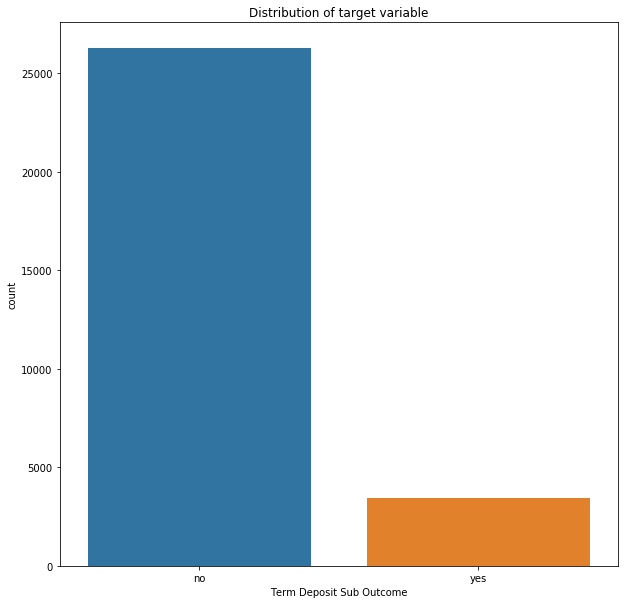

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(df['y'])
plt.xlabel('Term Deposit Sub Outcome')
plt.title('Distribution of target variable')
plt.show()

In [58]:
df['y'].value_counts()

no     26270
yes     3448
Name: y, dtype: int64

Let's explore the various metrics we have available to determine how 'well' our model performs.

We can begin with a simple confusion matrix which shows all possible outcomes. 

In this specific scenario, a false negative would occur when the model predicts that a customer will not subscribe, when they would have. We want to ensure that our false negatives are minimized as much as possible, otherwise we are passing up the opportunity to make a sale.

False positives however are lower risk, as our model would predict that an indivdual would subscribe, when in reality they won't. When we look at this problem through the lens of cost-benefit, the cost of a single phone call vs losing an entire subscription due to predicting that an individual is not worth calling is heavy. Therefore it would be more cost effective if we simply made 1 additional failed phone call than one that we did not make. 

These TP/FP/TN/FN values can be used to produce a few metrics that give us a better idea of how our model is performing. We will now explore Accuracy, Precision, and Recall below:

###### Accuracy:
Accuracy simply defines the number of correct predictions over the number of observations.

Accuracy = (TN + TP) / # of Observations

This metric only takes into account correct assumptions, with the large amount of class imbalance we have, we would directly have a high Accuracy in a no skill model situation that predicts no for every customer, however this does not take into account the details we wish to minimize, which would be our False Negatives.

###### Precision: 
Precision determine the amount of true predictions. 
Precision = TP / (TP + FP). 

This calculation would be fantastic if we wanted to minimize false positives, however in our analysis it is more important to minimize false negatives for our situation. The precision score will not be the metric we focus on.

###### Recall: 
Recall defineds out of all true observations, how many were accurately predicted?

Recall = TP / (TP+FN)

As discussed we wish to minimize our false negatives. This will be the metric we base our model's performance on, therefore we wish to have a model witha **high recall value**

###### ROC and AUC
Receiver Operating Characteristics (ROC) is developed by plotting the True Positive Rate, and Associated Area Under Curve (AUC). We will use the Youden's J statistic to determine the optimal point on the curve.

###### F1 Threshold
This metric shows us the weighted average between recall and precision. This tends to be the best way to determine a model's performance, however with our specific problem we will minimize the importance of the F1 metric.

#### Correcting Class Imbalance

Now we will begin to address our class imbalance. There are two methods we will use below, one using build in sklearn functionality, then using SMOTE(Synthetic Minority Oversampling Technique).

First lets start with creating a simple logistic regression model and utilizing the 'class_weight' parameter and analyze the performance.

In [59]:
# instantiate the logreg
logreg = LogisticRegression(fit_intercept = True, C = 1e17, random_state = random_state, class_weight = 'balance')

# fit model
logreg.fit(X_train, y_train)

# predictions
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print('Classification Report for Train Set')
print(classification_report(y_train, train_preds))
print('Classification Report for test set')
print(classification_report(y_test, test_preds))

Classification Report for Train Set
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20558
           1       0.68      0.24      0.36      2610

    accuracy                           0.90     23168
   macro avg       0.79      0.61      0.65     23168
weighted avg       0.88      0.90      0.88     23168

Classification Report for test set
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6853
           1       0.65      0.23      0.34       870

    accuracy                           0.90      7723
   macro avg       0.78      0.61      0.64      7723
weighted avg       0.88      0.90      0.88      7723



Next we will transition to using SMOTE, this will create a synthetic representation of the minority class in order to eliminate class imbalance.

In [60]:
smote = SMOTE(random_state= random_state)

# apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

#instantiate logreg
logreg = LogisticRegression(fit_intercept =True, C=1e17, random_state = random_state)

#fit model
logreg.fit(X_train_resampled, y_train_resampled)

#predictions
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test)

print('Classification Report for Resampled Train Set')
print(classification_report(y_train_resampled, train_preds))
print('Classification Report for Test Set')
print(classification_report(y_test, test_preds))

Classification Report for Resampled Train Set
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     20558
           1       0.81      0.63      0.71     20558

    accuracy                           0.74     41116
   macro avg       0.76      0.74      0.74     41116
weighted avg       0.76      0.74      0.74     41116

Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6853
           1       0.34      0.61      0.44       870

    accuracy                           0.82      7723
   macro avg       0.64      0.73      0.67      7723
weighted avg       0.88      0.82      0.84      7723



SMOTE clearly took the cake as the more effective method of eliminating class imbalance in our training set. We will be using our resampled training data moving forward with our model creation. This will also be wrapped into our final pipeline.

#### Baseline Model

We will begin with a Logistic Regression model to base future model performance off of.

In [61]:
logreg = LogisticRegression(fit_intercept = True, C = 1e17, random_state = random_state)

# Fit classifier
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1e+17, random_state=343)

In [62]:
# get predictions
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_test)

print('Classification Report for Resampled Train set')
print(classification_report(y_train_resampled, train_preds))
print('Classification Report for Test Set')
print(classification_report(y_test, test_preds))

Classification Report for Resampled Train set
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     20558
           1       0.81      0.63      0.71     20558

    accuracy                           0.74     41116
   macro avg       0.76      0.74      0.74     41116
weighted avg       0.76      0.74      0.74     41116

Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6853
           1       0.34      0.61      0.44       870

    accuracy                           0.82      7723
   macro avg       0.64      0.73      0.67      7723
weighted avg       0.88      0.82      0.84      7723



Now that we have a baseline model we will want to take a look at the confidence matrix. Let's make a function to print out a confidence matrix, this will make it more stream lined as we test more models.

In [63]:
def Conf_Plt(estimator, X_train, y_train, X_test, y_test):
    '''
    Plots confusion matrix for both train and test sets
    
    ARGS:
        estimator: Instance of estimator
        X_train: training features
        y_train: training target
        X_test: test features
        y_test: test target
    returns None
    '''
    fig,axes = plt.subplots(1,2, figsize = (10,6), sharey = 'row')
    plot_confusion_matrix(estimator, X_train, y_train, values_format = '.0f', ax = axes[0])
    axes[0].set_title('Training Set Confusion Matrix')
    plot_confusion_matrix(estimator, X_test, y_test, values_format = '.0f', ax = axes[1])
    axes[1].set_title('Test Set Confusion Matrix')
    plt.show()
    return None


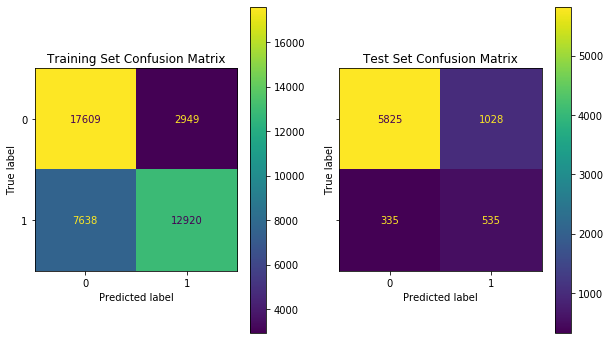

In [64]:
Conf_Plt(logreg,X_train_resampled, y_train_resampled, X_test, y_test)

As you can see above, the training set we have far more true positives proportionately compared to our test set. This is due to the fact we used SMOTE to eliminate class imbalance. We now want to see if we can get the false negatives lower than they currently are, since we want to have a high recall.

Let's take a look at the ROC/AUC metric now, this will give us a better idea of how our model performed as it provides probability scores.

In [65]:
# get probs
y_train_hat = logreg.fit(X_train_resampled, y_train_resampled).predict_proba(X_train_resampled)

# take column 2 for class 1 probs
y_train_score = y_train_hat[:,1]

# get probs
y_test_hat = logreg.fit(X_train_resampled, y_train_resampled).predict_proba(X_test)
#again grab second column for class 1 probs
y_test_score = y_test_hat[:,1]

Let's create a function for displaying our ROC curves for train and test sets.

In [66]:
def ROC_curve(clf_name, y_train,y_test, y_train_score, y_test_score):
    '''
    plots ROC curves for both train and test sets
    
    ARGS:
        clf_name: {string} name of estimator for display
        y_train: train target
        y_test: test target
        y_train_score: positive class prob predictions of train set
        y_test_score: positiive class prob predictions of test set
    returns None
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_score)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_score)
    
    # Calculate best threshold using Youden's J stat
    J_train = tpr_train - fpr_train
    ix_train = np.argmax(J_train)
    best_train_t = round(thresholds_train[ix_train], 3)
    J_test = tpr_test - fpr_test
    ix_test = np.argmax(J_test)
    best_test_t = round(thresholds_test[ix_test], 3)
    
    #plot ROC curves side by side
    fig, axes = plt.subplots(1,2, figsize=(15, 10))
    
    #plot ROC for Train
    axes[0].plot(fpr_train, tpr_train, color='blue', lw = 4, label = clf_name)
    # add point on line for best threshold
    axes[0].scatter(fpr_train[ix_train], tpr_train[ix_train], marker='o', zorder = 3, 
                    label='Best Threshold = {}'.format(best_train_t), color = 'red')
    # plot ROC for test
    axes[1].plot(fpr_test, tpr_test, color = 'blue', lw = 4, label = clf_name)
    #add point for best threshold
    axes[1].scatter(fpr_test[ix_test], tpr_test[ix_test], marker = 'o', zorder=3,
                   label = 'Best Threshold = {}'.format(best_train_t), color = 'red')
    
    # for both add line for reference (no skill line)
    for ax in axes:
        ax.plot([0,1], [0,1], color = 'green', lw=2, linestyle = '--', label = 'no skill')
        ax.set_xlabel('FP Rate')
        ax.set_ylabel('TP Rate')
        ax.legend(loc='upper left')
    
    axes[0].set_title('ROC curve - Train Set \n AUC = {}'.format(round(auc(fpr_train, tpr_train),2)))
    axes[1].set_title('ROC curve - Test Set \n AUC = {}'.format(round(auc(fpr_test,tpr_test),2)))
    plt.show()
    return None

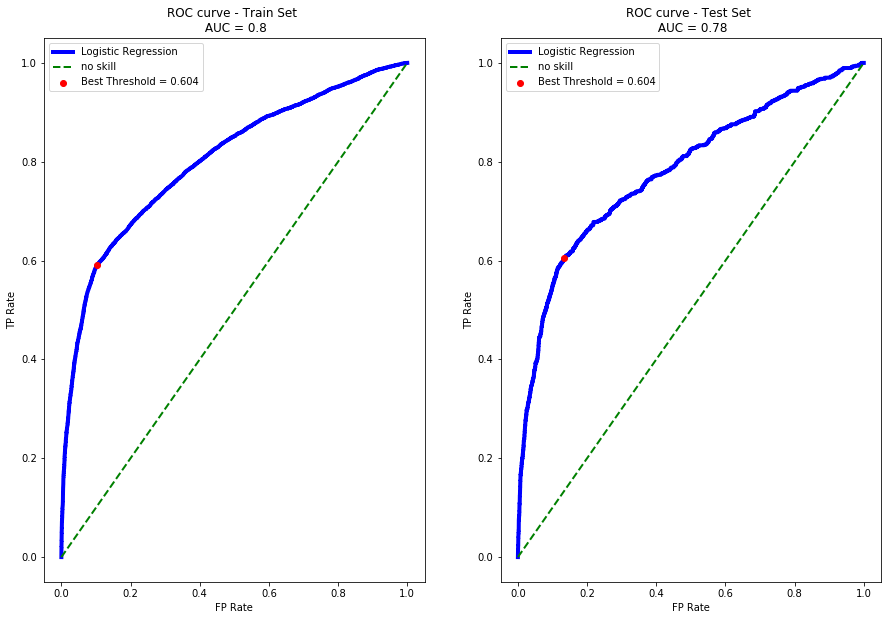

In [67]:
ROC_curve('Logistic Regression', y_train_resampled, y_test, y_train_score, y_test_score)

#### Classifiers
Now we will begin to test various classfiers to determine which produces the best results. First we will define a dictionary of classifiers with their default parameters for the time being. We will begin to tune these hyperparameters more once we have a general idea of which classifiers perform best.

In [68]:
clf_dict = {
    'Logistic Regression' : LogisticRegression(random_state=random_state),
    'Decision Tree' : DecisionTreeClassifier(random_state = random_state),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classification' : SVC(random_state = random_state, probability=True),
    'Random Forest': RandomForestClassifier(random_state = random_state),
    'AdaBoost' : AdaBoostClassifier(random_state = random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state = random_state),
    'XGBoost' : xgb.XGBClassifier()
}

In [69]:
# adapted from github.com/nadinezab/bank-marketing
# define function to batch classify
def batch_clf(X_train, y_train, X_test, y_test, clf_dict, verbose = False):
    '''
    This function fits a dict of classifiers, makes predictions, plots ROC, returns metrics
    
    args:
        X_train: {array-like, sparse matrix} of shape (n_samples, n_features) train input features
        y_train: array-like of shape (n_samples) train target values
        X_test: {array-like, sparse matrix} of shape (m_samples, m_features) test input features
        y_test: array-like of shape (m_samples) test target values
        clf_dict: dictionary, key name is classifier name, and value is classifier instance
        verbose: if True, prints time taken to fit and predict for each classifier
    '''
    
    times = []
    train_acc_scores = []
    test_acc_scores = []
    train_f1_scores = []
    test_f1_scores = []
    train_precision_scores = []
    test_precision_scores = []
    train_recall_scores = []
    test_recall_scores = []
    train_roc_data = []
    test_roc_data = []
    
    # loop through clf_dict
    for key, clf in clf_dict.items():
        start_time = time.clock()
        # fit
        clf_fit = clf.fit(X_train, y_train)
        
        # predict
        train_preds = clf_fit.predict(X_train)
        test_preds = clf_fit.predict(X_test)
        
        #accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)
        train_acc_scores.append(round(train_acc,2))
        test_acc_scores.append(round(test_acc,2))
        
        # F1 Score
        train_f1 = f1_score(y_train, train_preds)
        test_f1 = f1_score(y_test, test_preds)
        train_f1_scores.append(round(train_f1,2))
        test_f1_scores.append(round(test_f1, 2))
        
        # precision score
        train_precision = precision_score(y_train, train_preds)
        test_precision = precision_score(y_test, test_preds)
        train_precision_scores.append(round(train_precision, 2))
        test_precision_scores.append(round(test_precision,2))
        
        # recall scores
        train_recall = recall_score(y_train, train_preds)
        test_recall = recall_score(y_test, test_preds)
        train_recall_scores.append(round(train_recall, 2))
        test_recall_scores.append(round(test_recall,2))
        
        # probability preds
        train_hat = clf_fit.predict_proba(X_train)
        train_proba = train_hat[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_proba)
        train_roc_data.append([fpr_train, tpr_train, thresholds_train])
        
        test_hat = clf_fit.predict_proba(X_test)
        test_proba = test_hat[:,1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_proba)
        test_roc_data.append([fpr_test, tpr_test, thresholds_test])
        
        end_time = time.clock()
        time_elapsed = end_time - start_time
        times.append(round(time_elapsed,2))
        
        if verbose:
            print('trained {} in {}'.format(key, round(time_elapsed,2)))
    # create df from results
    results = pd.DataFrame({'Model': list(clf_dict.keys()),
                           'Time': time,
                           'Train Acc': train_acc_scores,
                           'Test Acc': test_acc_scores,
                           'Train F1': train_f1_scores,
                           'Test F1': test_f1_scores,
                           'Train Precision': train_precision_scores,
                           'Test Precision': test_precision_scores,
                           'Train Recall': train_recall_scores,
                           'Test Recall': test_recall_scores,
                           })
    fig, axes = plt.subplots(1,2, figsize=(15,10))
    
    for i in range(len(train_roc_data)):
        axes[0].plot(train_roc_data[i][0], train_roc_data[i][1], lw = 4, 
                     label = '{}'.format(list(clf_dict.keys())[i]))
    for i in range(len(test_roc_data)):
        axes[1].plot(test_roc_data[i][0], test_roc_data[i][1], lw=4,
                    label = '{}'.format(list(clf_dict.keys())[i]))
    for ax in axes:
        ax.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='upper right')
    axes[0].set_title('ROC curve - Train Set')
    axes[1].set_title('ROC curve - Test Set')
    plt.show()
    return results

trained Logistic Regression in 1.04
trained Decision Tree in 0.71
trained K-Nearest Neighbors in 56.43
trained Support Vector Classification in 929.43
trained Random Forest in 7.36
trained AdaBoost in 4.35
trained Gradient Boosting in 14.17
trained XGBoost in 12.69


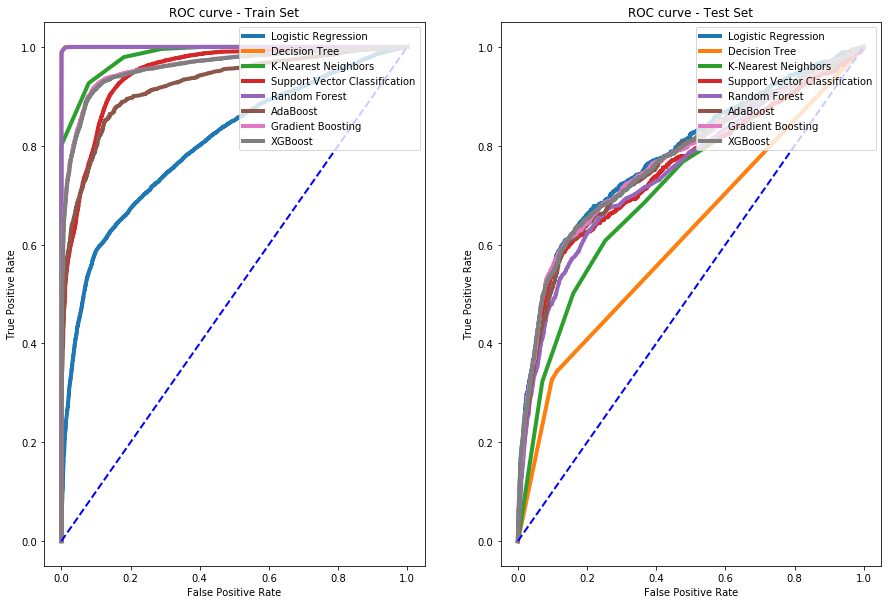

Model                        Time  Train Acc  \
0            Logistic Regression  <module 'time' (built-in)>       0.74   
1                  Decision Tree  <module 'time' (built-in)>       0.99   
2            K-Nearest Neighbors  <module 'time' (built-in)>       0.90   
3  Support Vector Classification  <module 'time' (built-in)>       0.84   
4                  Random Forest  <module 'time' (built-in)>       0.99   
5                       AdaBoost  <module 'time' (built-in)>       0.85   
6              Gradient Boosting  <module 'time' (built-in)>       0.90   
7                        XGBoost  <module 'time' (built-in)>       0.90   

   Test Acc  Train F1  Test F1  Train Precision  Test Precision  Train Recall  \
0      0.82      0.71     0.44             0.81            0.34          0.63   
1      0.84      0.99     0.31             1.00            0.30          0.99   
2      0.73      0.91     0.34             0.84            0.23          0.98   
3      0.87      0.82     0.47             0.91            0.43          0.75   
4      0.88      0.99     0.39             1.00            0.44          0.99   
5      0.85      0.85     0.45             0.88            0.38          0.82   
6      0.88      0.90     0.48             0.93            0.47          0.87   
7      0.88      0.90     0.48             0.93            0.47          0.87   

   Test Recall  
0         0.61  
1         0.33  
2         0.61  
3         0.51  
4         0.35  
5         0.55  
6         0.48  
7         0.48

In [73]:
outcomes = batch_clf(X_train_resampled, y_train_resampled, X_test, y_test, clf_dict, verbose=True)
outcomes

Taking a look at our times alone, we can immediately eliminate Support Vector Classification, and K-Nearest Neighbors. These 2 methods took quite a long time and would prove to not be an efficient method as a resuable pipeline. So now we take a look at the metics we want to maximize, F1 and Recall. We will go based on the Test recall, but try to ensure that the model is not overfit to training data, if you see the Decision Tree, it looks to heavily overfit our training data. AdaBoost has a high Recall, but a slightly lower F1. Gradient Boosting also performed decently, then XGBoost seems to be in a comfortable spot as well. 

We will focus on AdaBoost, Gradient Boosing, and XGBoost for our model. However we will begin to slowly tune the hyperparamters of these methods to maximize the prediction power and determine which will be our final product.

##### Tuning Classifiers
___

In [74]:
RF_params = {'clf__max_depth': [4,5,6,10,15],
             'clf__criterion': ['gini', 'entropy'],
             'clf__n_estimators': [100, 200, 300],
             'clf__min_samples_split': [3,5,10],
             'clf__min_samples_leaf': [3,4,6]
            }
DT_params = {'clf__max_depth': [5,25,50],
             'clf__criterion': ['gini', 'entropy'],
             'clf__min_samples_split': [3,5,10]
            }
LR_params = {'clf__solver': ['liblinear'],
             'clf__C':[0.1,1]
            }
KNN_params ={'clf__n_neighbors': [3,5,11,15],
             'clf__weights': ['uniform', 'distance'],
             'clf_p': [1,5]
            }
AB_params = {'clf__n_estimators': [20,50,100,200],
             'clf__learning_rate': [0.5,1,1.5]}
GB_params = {'clf__n_estimators': [20,50,100,200],
             'clf__max_depth': [3,5,10,15]}
XGB_params ={'clf__n_estimators': [20,50,100,200], 
             'clf__max_depth': [3,5,10,15],
             'clf__min_child_weight': [2,3,5]}

Now in order to keep track of our classifiers and allow for a pipeline and randomized search, we decided to use a nested dictionary structure. Since we will be performing corss validation we will want to ensure that a pipeline is setup with SMOTE, then use the classifier. This is due to the fact if we use out X_resampled set we would be applying SMOTE to the testing fold as well, which is not representative of our true test set.

In [80]:
# create new dictionary
tuning_clf_dict = {}

for k,v in clf_dict.items():
    tuning_clf_dict[k] = {}
    # add clfs
    tuning_clf_dict[k]['clf'] = v
#remove SVM from clf
del tuning_clf_dict['Support Vector Classification']
del tuning_clf_dict['K-Nearest Neighbors']
#Add pipeline to nested dictionary
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['pipeline'] = Pipeline([('smote', smote), ('clf', tuning_clf_dict[k]['clf'])])

# add key param_grid and default empty dict val
for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['param_grid'] = {}
    
#reassign param grid to param classifier
tuning_clf_dict['Logistic Regression']['param_grid'] = LR_params
tuning_clf_dict['Decision Tree']['param_grid'] = DT_params
tuning_clf_dict['Random Forest']['param_grid'] = RF_params
# tuning_clf_dict['K-Nearest Neighbors']['param_grid'] = KNN_params
tuning_clf_dict['AdaBoost']['param_grid'] = AB_params
tuning_clf_dict['Gradient Boosting']['param_grid'] = GB_params
tuning_clf_dict['XGBoost']['param_grid'] = XGB_params

# add RandomizedSearchCV to nested dict
cv = 3
scoring = 'recall'

for k in tuning_clf_dict.keys():
    tuning_clf_dict[k]['rscv'] = RandomizedSearchCV(estimator = tuning_clf_dict[k]['pipeline'],
                                                    param_distributions = tuning_clf_dict[k]['param_grid'],
                                                    scoring = scoring,
                                                    cv = cv)
# create new dict with clf names and RSCV object
# allows to be passed into batch_clf function
rscv_dict = {}

for k in tuning_clf_dict.keys():
    rscv_dict[k] = tuning_clf_dict[k]['rscv']

trained Logistic Regression in 5.35
trained Decision Tree in 21.86
trained Random Forest in 136.03
trained AdaBoost in 136.7
trained Gradient Boosting in 773.69
trained XGBoost in 689.52


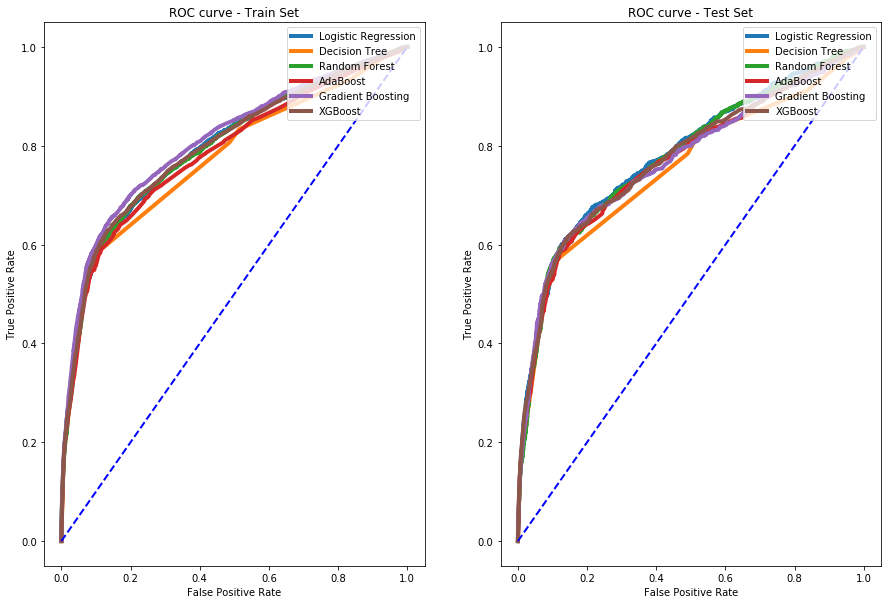

Model                        Time  Train Acc  Test Acc  \
0  Logistic Regression  <module 'time' (built-in)>       0.83      0.82   
1        Decision Tree  <module 'time' (built-in)>       0.87      0.86   
2        Random Forest  <module 'time' (built-in)>       0.81      0.80   
3             AdaBoost  <module 'time' (built-in)>       0.82      0.82   
4    Gradient Boosting  <module 'time' (built-in)>       0.88      0.87   
5              XGBoost  <module 'time' (built-in)>       0.85      0.85   

   Train F1  Test F1  Train Precision  Test Precision  Train Recall  \
0      0.45     0.44             0.35            0.34          0.63   
1      0.49     0.46             0.43            0.40          0.57   
2      0.43     0.41             0.32            0.30          0.65   
3      0.44     0.43             0.34            0.33          0.62   
4      0.51     0.48             0.46            0.43          0.58   
5      0.48     0.46             0.40            0.38          0.61   

   Test Recall  
0         0.62  
1         0.53  
2         0.63  
3         0.61  
4         0.54  
5         0.59

In [82]:
rscv_outcome = batch_clf(X_train, y_train, X_test, y_test, rscv_dict, verbose = True)
rscv_outcome

We can see a distinct increase in model performance when tuning our models further. Out of our models, we are looking for a high recall score, while maintaining a respectible F1 score. Out of all of our models it seems XGBoost takes the cake as the best performing model with an acceptible runtime. We will now take a further look into optimizing our XGBoost by using a GridSearchCV.

##### XGBoost
___

In [92]:
# create XGBoost instance
xgboost = xgb.XGBClassifier(random_state = random_state)

#define pipeline
pipeline = Pipeline([('smote', smote), ('clf', xgboost)])

# define parameter grid
XGB_parameters = {
    'clf__n_estimators': [20, 50, 100],
    'clf__max_depth': [3,5, 10],
    'clf__min_child_weight': [2,3,5]
}

cv = 5

# define GridSearch
xgboost_grid = GridSearchCV(estimator = pipeline, param_grid = XGB_parameters, scoring = scoring, cv=cv)

# fit XGBgrid
xgboost_grid_fitted = xgboost_grid.fit(X_train, y_train)

#get predictions
train_pred = xgboost_grid_fitted.predict(X_train)
test_pred = xgboost_grid_fitted.predict(X_test)

# determine probabilities
train_hat = xgboost_grid_fitted.predict_proba(X_train)
train_probs = train_hat[:,1]
test_hat = xgboost_grid_fitted.predict_proba(X_test)
test_probs = test_hat[:,1]


In [93]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      6853
           1       0.38      0.59      0.46       870

    accuracy                           0.85      7723
   macro avg       0.66      0.73      0.69      7723
weighted avg       0.88      0.85      0.86      7723



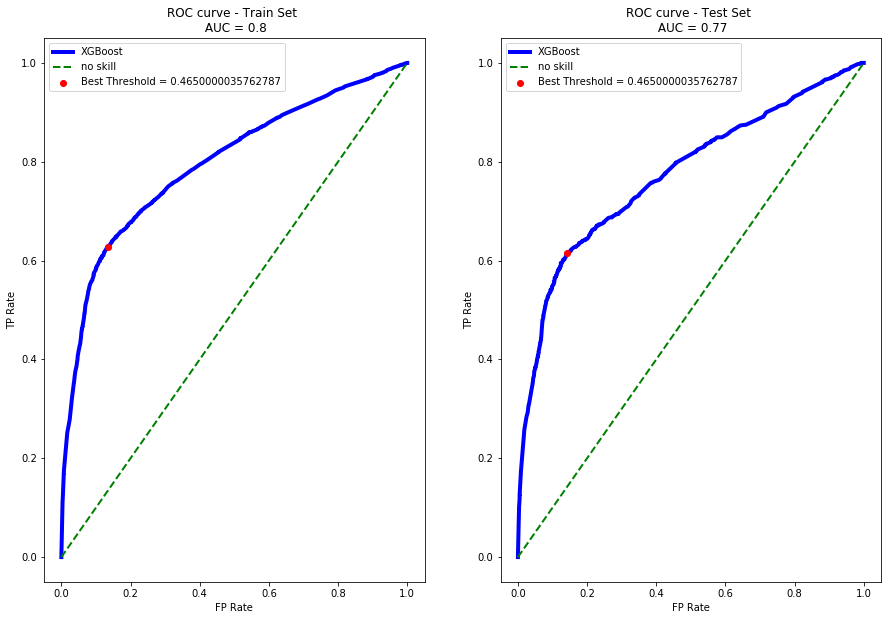

In [94]:
ROC_curve('XGBoost', y_train, y_test, train_probs, test_probs)

We can see our model performed better than previously seen with the RandomSearchCV. Our ROC curves show that our performance is roughly similar without overfitting our data.

Now we will take a look at what parameters worked best, what features were significant, and then we will have our final interpretation of the data and model.

In [95]:
model_best_param = xgboost_grid.best_params_
model_best_param

{'clf__max_depth': 3, 'clf__min_child_weight': 5, 'clf__n_estimators': 20}

In [96]:
# feature importances
xgboost_grid.best_estimator_[1].feature_importances_

array([0.09549391, 0.01879251, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02577384, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00891859, 0.        , 0.        , 0.00262857,
       0.00387569, 0.        , 0.        , 0.        , 0.        ,
       0.06497712, 0.        , 0.02722172, 0.        , 0.02609289,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02773013, 0.        , 0.02133362,
       0.02042812, 0.        , 0.        , 0.06764338, 0.01378802,
       0.        , 0.01768229, 0.00353429, 0.        , 0.08659132,
       0.        , 0.12412741, 0.04294023, 0.30042642], dtype=float32)

Now that we have numerical values for out feature importance, lets create a graph for these values. We also notice there are a number of 0 values, these are values that XGBoost determined to be insignificant.

Now we will go ahead and rank our features the XGBoost decided were significant.

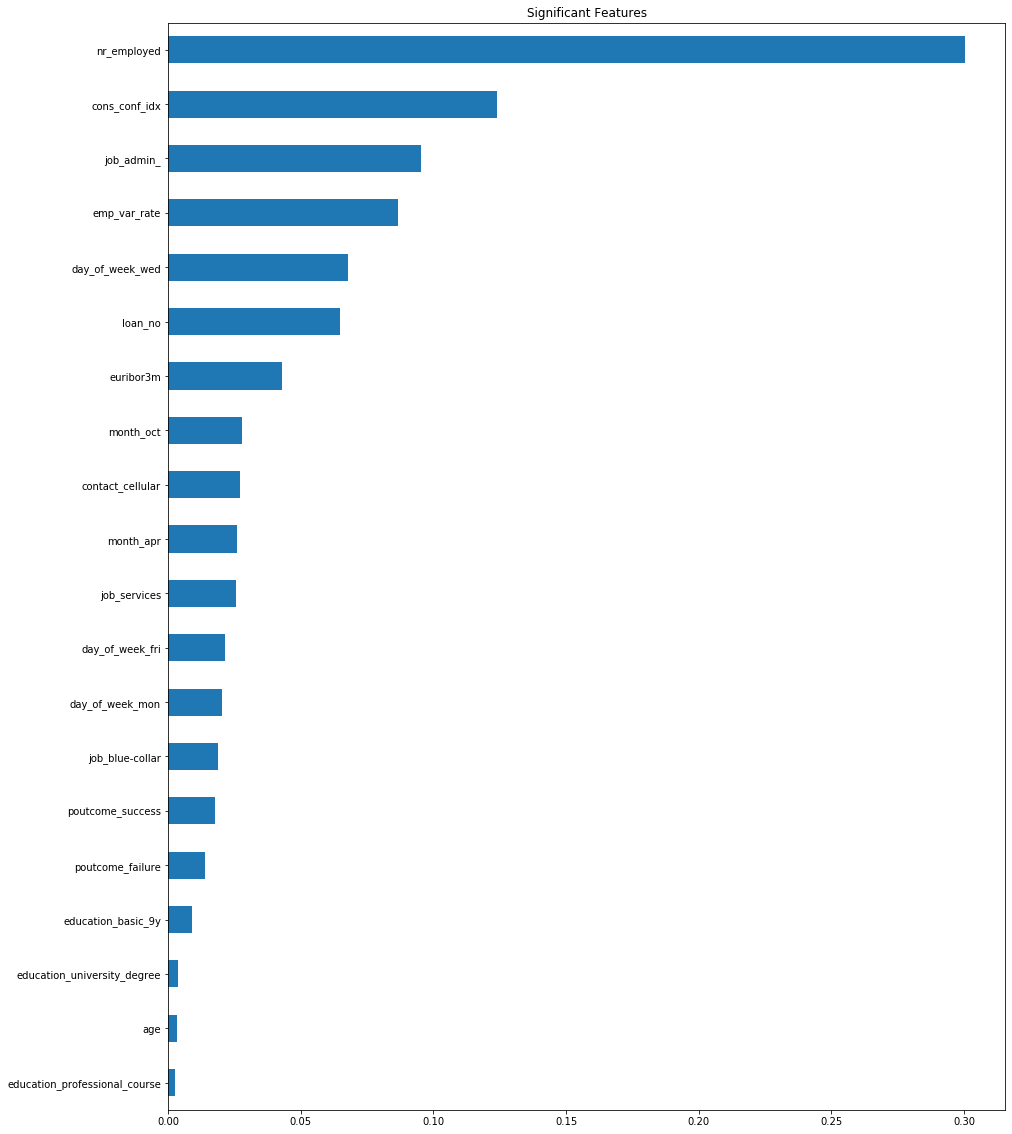

In [102]:
features = pd.Series(xgboost_grid.best_estimator_[1].feature_importances_, index = X_prepared.columns)
# sort series
features = features.sort_values(ascending = True)
#Drop our 0 values
features = features[features !=0]
# plot graph
features.plot(kind = 'barh', figsize=(15,20))
plt.title('Significant Features')
plt.show()

Now that we have an idea at how our features stack up, lets create a graph that shows up the top 5 features, this will be a portion of our business presentation.

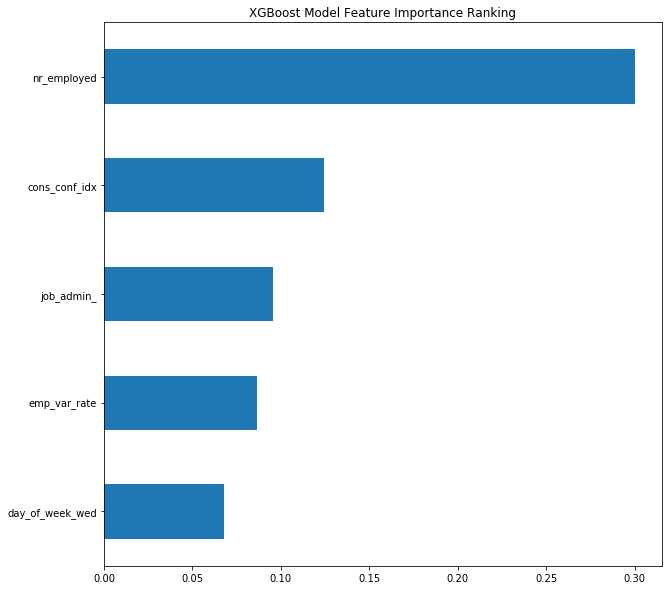

In [103]:
features[-5:].plot(kind = 'barh', figsize = (10,10))
plt.title('XGBoost Model Feature Importance Ranking')
plt.show()

##### Test Set Predictions
___
Now lets move to test our model on the test set we defined at the beginning of our analysis.

In [105]:
# define our whole pipeline
full_pipeline = Pipeline([
    ('syntaxclean', SyntaxCleaner()),
    ('numprocess', NumericPreprocess()),
    ('unknownimputer', ImputeUnknown()),
    ('catprocess', cat_process),
    ('smote', smote),
    ('clf', xgb.XGBClassifier(random_state = random_state,
                             max_depth = 3,
                             min_child_weight =5, 
                             n_estimators = 20))
])

In [106]:
df_copy = test_set.reset_index(drop=True)

y = df_copy['y']

X = df_copy.drop('y', axis = 1)

y = y.map(lambda x: 1 if x == 'yes' else 0)
X.head()

age          job   marital          education  default housing loan  \
0   44     services  divorced        high.school       no     yes  yes   
1   28      student    single            unknown       no      no   no   
2   39  blue-collar   married           basic.9y       no      no   no   
3   32   technician    single  university.degree       no     yes  yes   
4   51  blue-collar   married           basic.4y  unknown      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   apr         tue       895         1    999         0   
1   cellular   aug         thu       700         4    999         1   
2   cellular   apr         thu        73         1    999         1   
3   cellular   aug         mon       508         3    999         0   
4  telephone   may         tue       708         2    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent          -1.8          93.075          -47.1      1.453   
1      failure          -2.9          92.201          -31.4      0.829   
2      failure          -1.8          93.075          -47.1      1.483   
3  nonexistent           1.4          93.444          -36.1      4.965   
4  nonexistent           1.1          93.994          -36.4      4.856   

   nr.employed  
0       5099.1  
1       5076.2  
2       5099.1  
3       5228.1  
4       5191.0

In [107]:
full_pipeline.fit(X,y)

Pipeline(steps=[('syntaxclean', SyntaxCleaner()),
                ('numprocess', NumericPreprocess()),
                ('unknownimputer', ImputeUnknown()),
                ('catprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('smote', SMOTE(random_state=343)),
                ('clf',
                 XGBClassifier(min_child_weight=5, n_estimators=20,
                               random_state=343))])

In [111]:
test_preds = full_pipeline.predict(X)

In [112]:
print(classification_report(y,test_preds))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9137
           1       0.35      0.62      0.45      1160

    accuracy                           0.83     10297
   macro avg       0.65      0.74      0.67     10297
weighted avg       0.88      0.83      0.85     10297



We can see even with totally foreign data our model performs relatively consistent. Now lets take a look at the confusion matrix for this test.

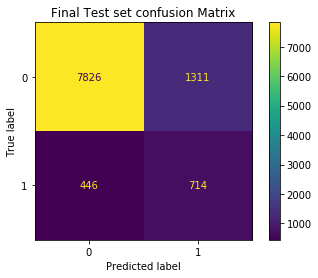

In [115]:
#plot confusion matrix
plot_confusion_matrix(full_pipeline, X,y,values_format='.0f')
plt.title('Final Test set confusion Matrix')
plt.show()

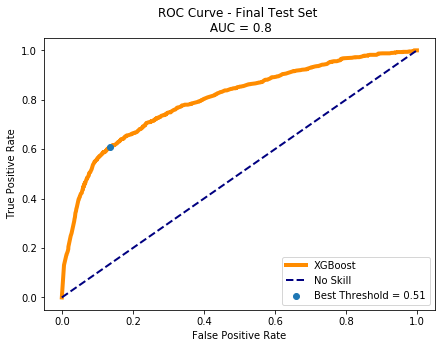

In [117]:
# Predict probabilities on test set
test_hat = full_pipeline.predict_proba(X)

# Take class 'y' probabilities
test_proba = test_hat[:,1]

fpr_test, tpr_test, thresholds_test = roc_curve(y, test_proba)

# Get best threshold using Youden's J statistic
J_test = tpr_test - fpr_test
ix_test = np.argmax(J_test)
best_test_t = round(thresholds_test[ix_test],3)

# Plot ROC curve
plt.figure(figsize = (7,5))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=4, label= 'XGBoost')
plt.scatter(fpr_test[ix_test], tpr_test[ix_test], marker='o', 
                zorder = 3, label=f'Best Threshold = {best_test_t:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title(f'ROC Curve - Final Test Set \n AUC = {round(auc(fpr_test, tpr_test),2)}')
plt.show()

### Conclusion
We have developed a large number of observations during this analysis. Here we will highlight some of our **recommendations** and our **future work**.

###### Recommendations:
* Make more calls in May
* Focus efforts for calls on Friday
* Target individuals who have subscribed in previous campaigns

###### Future Work:
* Take a deeper statistical look at how exactly the day_of_week and month features determine the outcome.
* Explore additional machine learning models to find more efficient and effective methods.
* Collect additional foreign data to preprocess and increase power of model.